# DARLIN application (Fig 4): lineage preprocessing

Here, given the output from snakemake_DARLIN, which converts fastq files to individual alleles associated with each cell, we identify the rare alleles as well asa collection of cells belonging to the same clone.

You need to install mosaiclineage for running this pipeline: https://github.com/ShouWenWang-Lab/MosaicLineage

In [1]:
import cospar as cs
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import mosaiclineage as mosaic
import mosaiclineage.help_functions as hf
import mosaiclineage.plot_scripts as mosaic_pl

import importlib
importlib.reload(hf)
importlib.reload(mosaic_pl)

%matplotlib inline

## setting cospar
cs.logging.print_version()
cs.settings.verbosity=0
cs.settings.set_figure_params(format='pdf',figsize=[4,3.5],dpi=75,fontsize=14,pointsize=2)

## notebook specific parameters
target_sample='20220815_LL837_10X_3A'
read_cutoff=3  # Read cutoff: each UMI must be covered by at least 3 reads
min_clone_size=2  # Clone size cutoff: only clones with at least 2 UMI will be used in downstream analysis
frequency_cutoff=2*10**(-5) # Allele probability cutoff: the allele generation probability must be lower than this value
max_rep_N=1 # Mouse replicate number cutoff: this allele can appear in less than max_rep_N mouse samples in our allele bank

## setup folders 
root_path='../DATA'
ref_dir=mosaic.settings.ref_dir # allele bank reference, located within the MosalicLineage repository

if os.path.exists(root_path):
    data_path=os.path.join(root_path,target_sample,'analysis','data')
    figure_path=os.path.join(root_path,target_sample,'analysis','figure')
    os.makedirs(data_path,exist_ok=True)
    os.makedirs(figure_path,exist_ok=True)
    cs.settings.data_path=data_path
    cs.settings.figure_path=figure_path

/home/shouwen/miniconda3/envs/CoSpar_test/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


Running cospar 0.3.3 (python 3.8.18) on 2023-10-09 21:27.


ERROR: XMLRPC request failed [code: -32500]
RuntimeError: PyPI no longer supports 'pip search' (or XML-RPC search). Please use https://pypi.org/search (via a browser) instead. See https://warehouse.pypa.io/api-reference/xml-rpc.html#deprecated-methods for more information.


# Analyze alleles from each locus separately

## CC

In [2]:
SampleList_RAW=['LL837-LF-CC_S1','LL837-lung-CC_S4','LL837-spleen-CC_S3','LL837-liver-CC_S5','LL837-skull-CC_S2']

short_names=[x.split('LL837-')[1].split('_')[0] for x in hf.extract_first_sample_from_a_nesting_list(SampleList_RAW)]
dict(zip(short_names,SampleList_RAW))

{'LF': 'LL837-LF-CC_S1',
 'lung': 'LL837-lung-CC_S4',
 'spleen': 'LL837-spleen-CC_S3',
 'liver': 'LL837-liver-CC_S5',
 'skull': 'LL837-skull-CC_S2'}

In [3]:
#SampleList=[x+'.cCARLIN' for x in SampleList_RAW]
locus='CC'
target_sample_NEW=target_sample+f'/{locus}'
df_ref=pd.read_csv(f'{ref_dir}/reference_merged_alleles_{locus}_Gr.csv').filter(["allele","normalized_count",'sample_count'])

data_path_1=os.path.join(root_path,target_sample_NEW,'CARLIN',f'results_cutoff_override_{read_cutoff}')

Invalid fraction 0.07655872924395779


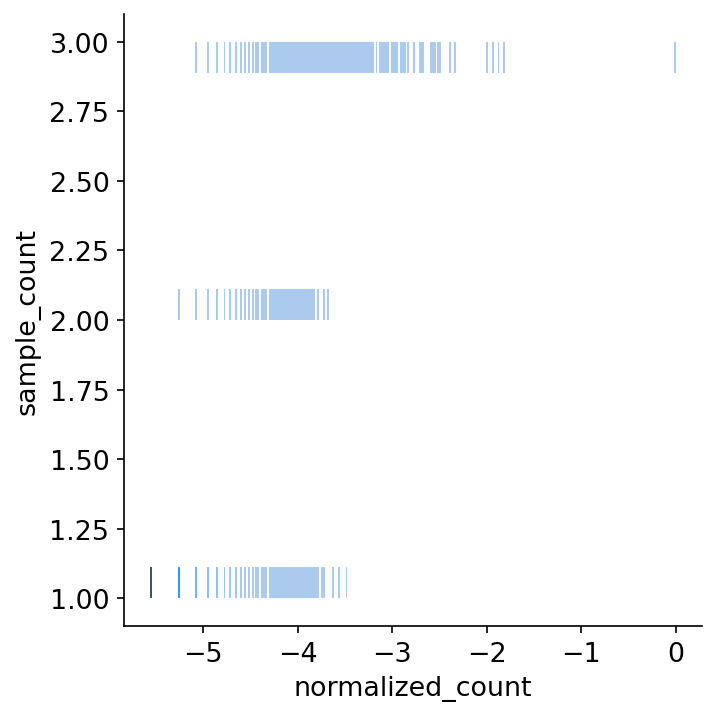

In [4]:
sns.displot(x=np.log10(df_ref['normalized_count']),y=df_ref['sample_count'],kind='hist')
df_ref['invalid_alleles']=(df_ref['sample_count']>max_rep_N) | (df_ref['normalized_count']>frequency_cutoff)
print("Invalid fraction",np.mean(df_ref['invalid_alleles']))

In [5]:
adata_CC, df_all_CC=mosaic_pl.analyze_cell_coupling(data_path_1,SampleList_RAW,df_ref,source=None,
                                                    short_names=short_names,
                                                    plot_restricted=False,
                                                    min_clone_size=min_clone_size,
                                                    plot_sample_number=False,
                                                    plot_barcodes_binary=False,
                                                    plot_barcodes_normalize=False,
                                                    plot_cell_count=False,
                                                    plot_hierarchy=False,
                                                    plot_Jaccard=False,
                                                    plot_pie=False,
                                                    plot_correlation=False,)

Apply minimum clone size 2
cell number sample_info.csv does not exist or ignore cell number information. Do not perform cell number correction for the obs_UMI_count
Clone number (before correction): 1489
Cell number (before correction): 1981
Clone number (after correction): 382
Cell number (after correction): 689


100%|████████████████████████████████████████████████████████████████| 2962/2962 [00:00<00:00, 785603.16it/s]


In [6]:
df_all_CC

,allele,UMI_count,sample,mouse,CB,CB_N,CARLIN,CARLIN_length,clone_size,normalized_count,sample_count,invalid_alleles
0,[],323,LL837-LF,LL837-LF,"AAAGGATAGTTGTACC,AAAGTGATCCCTTGGT,AACCATGTCCGA...",323,CGCCGGACTGCACGACAGTCGACGATGGAGTCGACACGACTCGCGC...,276,1699,1.000000,3.0,True
1,[],430,LL837-lung,LL837-lung,"AAACCCAAGTGGTGAC,AAAGGGCCAACAAGTA,AAAGGGCTCGGC...",430,CGCCGGACTGCACGACAGTCGACGATGGAGTCGACACGACTCGCGC...,276,1699,1.000000,3.0,True
2,[],212,LL837-spleen,LL837-spleen,"AAACGCTGTACAGTTC,AAAGGATAGATCGCCC,AAAGGTAAGGAT...",212,CGCCGGACTGCACGACAGTCGACGATGGAGTCGACACGACTCGCGC...,276,1699,1.000000,3.0,True
3,[],198,LL837-liver,LL837-liver,"AAACGAAGTTTACCTT,AAAGGATCACATTACG,AAAGTCCGTTGC...",198,CGCCGGACTGCACGACAGTCGACGATGGAGTCGACACGACTCGCGC...,276,1699,1.000000,3.0,True
4,[],536,LL837-skull,LL837-skull,"AAACGCTTCCTTCTGG,AAAGGATGTCCCTAAA,AAAGGTAAGAGT...",536,CGCCGGACTGCACGACAGTCGACGATGGAGTCGACACGACTCGCGC...,276,1699,1.000000,3.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1976,22_168del,1,LL837-skull,LL837-skull,TGATCAGCAACACAGG,1,CGCCGGACTGCACGACAGTCGCGACTGTACGCACACGCGATGGAGT...,129,1,0.000033,3.0,True
1977,22_70del,1,LL837-skull,LL837-skull,CAGATACCAACGATCT,1,CGCCGGACTGCACGACAGTCGCTACGACGATGGAGTCGCGAGCGCT...,227,1,0.000011,2.0,True
1978,"22_70del,100G>T,115_154delinsCGACTGTACGATGGAGT...",1,LL837-skull,LL837-skull,GACATCACAGCTCGGT,1,CGCCGGACTGCACGACAGTCGCTACGACGATGGAGTCGCGAGCGCT...,188,1,NaN,NaN,NaN
1979,"4_31delinsGACACGAGCTGTACAAGTAAGCGGCG,104_105insC",1,LL837-skull,LL837-skull,TGTAAGCGTCCCTGTT,1,CGCGACACGAGCTGTACAAGTAAGCGGCGCGACACGACTCGCGCAT...,275,1,NaN,NaN,NaN


In [7]:
del adata_CC.uns
adata_CC.write_h5ad(f'{data_path_1}/merge_all/sample_by_allele_adata.h5ad')
df_all_CC.to_csv(f'{data_path_1}/merge_all/df_allele_all.csv',index=0)

## TC

In [8]:
SampleList_RAW=['LL837-LF-TC_S6','LL837-lung-TC_S9','LL837-spleen-TC_S8','LL837-liver-TC_S10','LL837-skull-TC_S7']

short_names=[x.split('LL837-')[1].split('_')[0] for x in hf.extract_first_sample_from_a_nesting_list(SampleList_RAW)]
dict(zip(short_names,SampleList_RAW))

{'LF': 'LL837-LF-TC_S6',
 'lung': 'LL837-lung-TC_S9',
 'spleen': 'LL837-spleen-TC_S8',
 'liver': 'LL837-liver-TC_S10',
 'skull': 'LL837-skull-TC_S7'}

In [9]:
#SampleList=[x+'.Tigre' for x in SampleList_RAW]
locus='TC'
target_sample_NEW=target_sample+f'/{locus}'
df_ref=pd.read_csv(f'{ref_dir}/reference_merged_alleles_{locus}_Gr.csv').filter(["allele","normalized_count",'sample_count'])

data_path_1=os.path.join(root_path,target_sample_NEW,'CARLIN',f'results_cutoff_override_{read_cutoff}')

Invalid fraction 0.05831675543861901


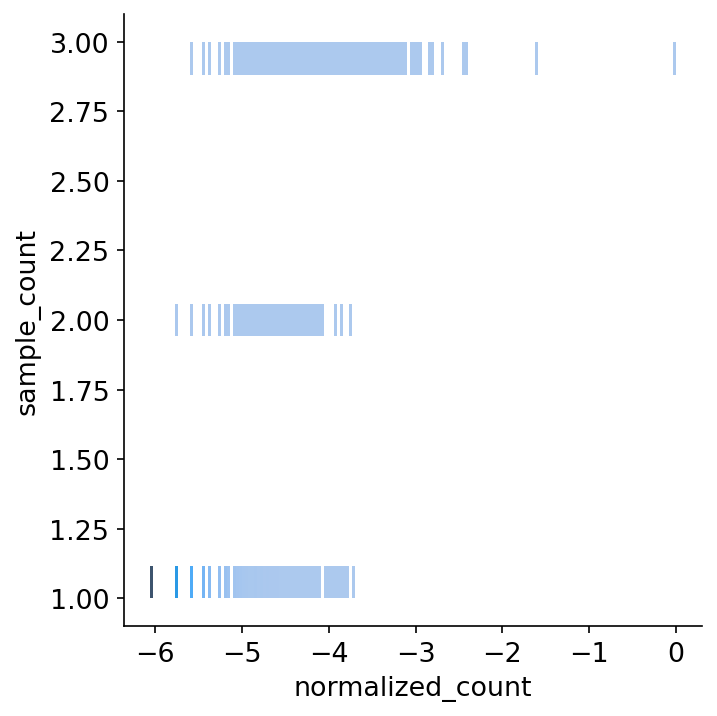

In [10]:
sns.displot(x=np.log10(df_ref['normalized_count']),y=df_ref['sample_count'],kind='hist')
df_ref['invalid_alleles']=(df_ref['sample_count']>max_rep_N) | (df_ref['normalized_count']>frequency_cutoff)
print("Invalid fraction",np.mean(df_ref['invalid_alleles']))

In [11]:
adata_TC, df_all_TC=mosaic_pl.analyze_cell_coupling(data_path_1,SampleList_RAW,df_ref,source=None,
                                                    short_names=short_names,
                                                    plot_restricted=False,
                                                    min_clone_size=min_clone_size,
                                                    plot_sample_number=False,
                                                    plot_barcodes_binary=False,
                                                    plot_barcodes_normalize=False,
                                                    plot_cell_count=False,
                                                    plot_hierarchy=False,
                                                    plot_Jaccard=False,
                                                    plot_pie=False,
                                                    plot_correlation=False,)

Apply minimum clone size 2
cell number sample_info.csv does not exist or ignore cell number information. Do not perform cell number correction for the obs_UMI_count
Clone number (before correction): 3109
Cell number (before correction): 4094
Clone number (after correction): 1098
Cell number (after correction): 1801


100%|████████████████████████████████████████████████████████████████| 8602/8602 [00:00<00:00, 645959.16it/s]


In [12]:
del adata_TC.uns
adata_TC.write_h5ad(f'{data_path_1}/merge_all/sample_by_allele_adata.h5ad')
df_all_TC.to_csv(f'{data_path_1}/merge_all/df_allele_all.csv',index=0)

## RC

In [13]:
SampleList_RAW=['LL837-LF-RC_S11','LL837-lung-RC_S14','LL837-spleen-RC_S13','LL837-liver-RC_S15','LL837-skull-RC_S12']

short_names=[x.split('LL837-')[1].split('_')[0] for x in hf.extract_first_sample_from_a_nesting_list(SampleList_RAW)]
dict(zip(short_names,SampleList_RAW))

{'LF': 'LL837-LF-RC_S11',
 'lung': 'LL837-lung-RC_S14',
 'spleen': 'LL837-spleen-RC_S13',
 'liver': 'LL837-liver-RC_S15',
 'skull': 'LL837-skull-RC_S12'}

In [14]:
locus='RC'
target_sample_NEW=target_sample+f'/{locus}'
df_ref=pd.read_csv(f'{ref_dir}/reference_merged_alleles_{locus}_Gr.csv').filter(["allele","normalized_count",'sample_count'])

data_path_1=os.path.join(root_path,target_sample_NEW,'CARLIN',f'results_cutoff_override_{read_cutoff}')

Invalid fraction 0.10168935542069871


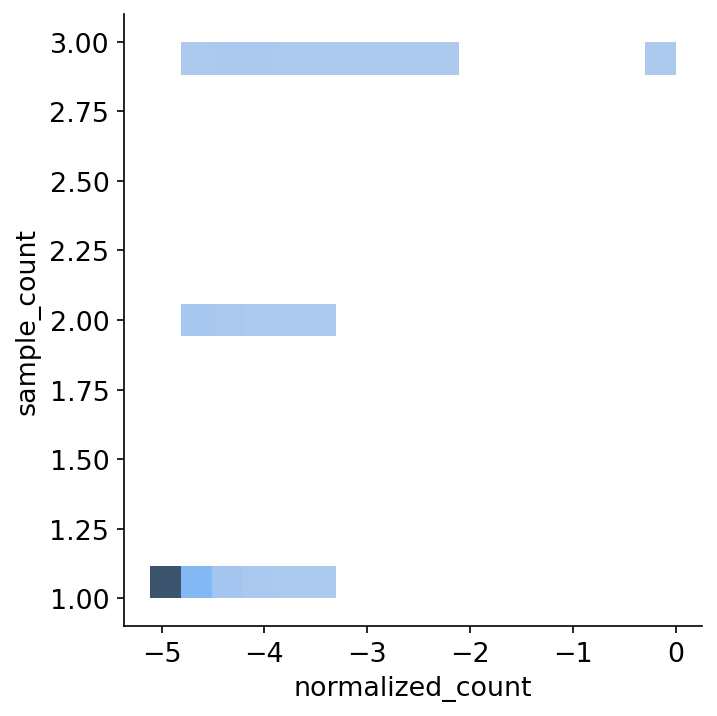

In [15]:
sns.displot(x=np.log10(df_ref['normalized_count']),y=df_ref['sample_count'],kind='hist')
df_ref['invalid_alleles']=(df_ref['sample_count']>max_rep_N) | (df_ref['normalized_count']>frequency_cutoff)
print("Invalid fraction",np.mean(df_ref['invalid_alleles']))

In [16]:
adata_RC, df_all_RC=mosaic_pl.analyze_cell_coupling(data_path_1,SampleList_RAW,df_ref,source=None,
                                                    short_names=short_names,
                                                    plot_restricted=False,
                                                    min_clone_size=min_clone_size,
                                                    plot_sample_number=False,
                                                    plot_barcodes_binary=False,
                                                    plot_barcodes_normalize=False,
                                                    plot_cell_count=False,
                                                    plot_hierarchy=False,
                                                    plot_Jaccard=False,
                                                    plot_pie=False,
                                                    plot_correlation=False,)

Apply minimum clone size 2
cell number sample_info.csv does not exist or ignore cell number information. Do not perform cell number correction for the obs_UMI_count
Clone number (before correction): 1135
Cell number (before correction): 1555
Clone number (after correction): 334
Cell number (after correction): 620


100%|████████████████████████████████████████████████████████████████| 3071/3071 [00:00<00:00, 803988.99it/s]


In [17]:
del adata_RC.uns
adata_RC.write_h5ad(f'{data_path_1}/merge_all/sample_by_allele_adata.h5ad')
df_all_RC.to_csv(f'{data_path_1}/merge_all/df_allele_all.csv',index=0)

# Call clones by integrating alleles from three locus

In [18]:
data_path_CC=os.path.join(root_path,target_sample,'CC','CARLIN',f'results_cutoff_override_{read_cutoff}')
df_all_CC=pd.read_csv(f'{data_path_CC}/merge_all/df_allele_all.csv')

data_path_TC=os.path.join(root_path,target_sample,'TC','CARLIN',f'results_cutoff_override_{read_cutoff}')
df_all_TC=pd.read_csv(f'{data_path_TC}/merge_all/df_allele_all.csv')

data_path_RC=os.path.join(root_path,target_sample,'RC','CARLIN',f'results_cutoff_override_{read_cutoff}')
df_all_RC=pd.read_csv(f'{data_path_RC}/merge_all/df_allele_all.csv')

df_all_CC['locus']='CC'
df_all_TC['locus']='TC'
df_all_RC['locus']='RC'
df_merge=pd.concat([df_all_CC,df_all_TC,df_all_RC])
df_sc_CARLIN=hf.generate_sc_CARLIN_from_CARLIN_output(df_merge)

In [19]:
df_sc_CARLIN_HQ=df_sc_CARLIN[(df_sc_CARLIN['normalized_count']<frequency_cutoff) & (df_sc_CARLIN['sample_count']<(max_rep_N+1))]
len(df_sc_CARLIN_HQ)/len(df_sc_CARLIN)

0.5021688635155178

In [20]:
len(df_sc_CARLIN_HQ[df_sc_CARLIN_HQ['sample_count']==max_rep_N])/len(df_sc_CARLIN_HQ)

0.1479603209986625

In [21]:
df_sc_CARLIN.filter(['allele','cell_bc','normalized_count',	'sample_count',	'invalid_alleles'])

,allele,cell_bc,normalized_count,sample_count,invalid_alleles
0,CC_[],AAAGGATAGTTGTACC,1.0,3.0,True
1,CC_[],AAAGTGATCCCTTGGT,1.0,3.0,True
2,CC_[],AACCATGTCCGATAGT,1.0,3.0,True
3,CC_[],AACCCAACACTCGATA,1.0,3.0,True
4,CC_[],AAGACAACATTAGGAA,1.0,3.0,True
...,...,...,...,...,...
35728,"RC_23_24insT,46G>A",CCTCCAATCCCTCGTA,0.0,0.0,0
35729,"RC_23_24insT,77_78insAAGAAAAA,132_132del,158_1...",CTTTCGGGTATTGACC,0.0,0.0,0
35730,RC_23A>G,CCACAAACACTAAACC,0.0,0.0,0
35731,"RC_16_25del,266_267insA",TATCTTGCAGGCCTGT,0.0,0.0,0


In [22]:
df_sc_data=df_sc_CARLIN

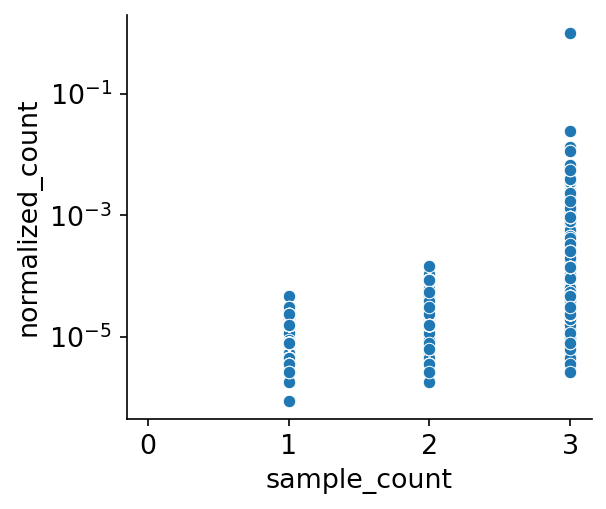

In [23]:
sns.scatterplot(data=df_sc_data,x='sample_count',y='normalized_count')
plt.yscale('log')

In [24]:
from mosaiclineage import DARLIN as car
importlib.reload(car)
df_sc_data_passing_list=[]
df_assigned_clone_passing_list=[]
df_allele_passing_list=[]
df_assigned_clone_list=[]
df_allele_list=[]
df_sc_data_input=df_sc_data
allele_N_cutoff=4 # below this number will be accepted (<),  maximum number of distinct alleles that a clone could have
sample_count_cutoff=max_rep_N+1 # below this number will be accepted (<)
prob_cutoff=frequency_cutoff

#save_data_des=f'probcut{prob_cutoff}_sampleCount{sample_count_cutoff}_allele_N_cutoff{allele_N_cutoff}'
for j in range(1):
    if len(df_sc_data_input)>0:
        print('iteration:',j)
        df_assigned_clones,df_sc_data_UPDATE,df_allele=car.assign_clone_id_by_integrating_locus(df_sc_data_input,sample_count_cutoff=sample_count_cutoff,
                                                                joint_allele_N_cutoff=allele_N_cutoff,locus_list=['CC','RC','TC'],prob_cutoff=prob_cutoff)
        df_sc_data_passing_list.append(df_sc_data_UPDATE[df_sc_data_UPDATE['joint_allele_num']<allele_N_cutoff])
        df_assigned_clone_list.append(df_assigned_clones)
        df_assigned_clones_PS_tmp=df_assigned_clones[df_assigned_clones['allele_num']<allele_N_cutoff]
        print(f'Identify {len(df_assigned_clones_PS_tmp)} joint clones with less than {allele_N_cutoff} alleles')
        df_assigned_clone_passing_list.append(df_assigned_clones_PS_tmp)
        df_allele_passing_list.append(df_allele[df_allele["joint_clone_id_tmp"].isin(df_assigned_clones_PS_tmp.explode("joint_clone_id_tmp_list")["joint_clone_id_tmp_list"])])
        df_allele_list.append(df_allele)
        df_sc_data_input=df_sc_data_UPDATE[df_sc_data_UPDATE['joint_allele_num']>=allele_N_cutoff]

df_assigned_clone_final=pd.concat(df_assigned_clone_passing_list)
df_allele_final=pd.concat(df_allele_passing_list)
df_sc_data_final=pd.concat(df_sc_data_passing_list)

iteration: 0
renaming fraction after initial filtering (sample_count_cutoff=2, prob_cutoff=2e-05): 0.50
CC


100%|█████████████████████████████████████████████████████████████████| 1747/1747 [00:00<00:00, 13238.39it/s]

RC



100%|█████████████████████████████████████████████████████████████████| 1577/1577 [00:00<00:00, 13320.96it/s]


TC


100%|██████████████████████████████████████████████████████████████████| 3589/3589 [00:00<00:00, 8780.90it/s]


Identify 4403 joint clones with less than 4 alleles


In [25]:
(df_sc_data_final['sample_count']==0).mean()

0.8492202048417132

In [26]:
df_sc_data_v2=df_sc_data.merge(df_sc_data_final.filter(
    ['RNA_id','allele','joint_clone_id_tmp','joint_clone_id','joint_prob','joint_allele_num','BC_consistency']),
                   on=['RNA_id','allele'],how='outer')
df_sc_data_v2.to_csv(os.path.join(root_path,target_sample,f'df_sc_data_{read_cutoff}.csv'),index=0)

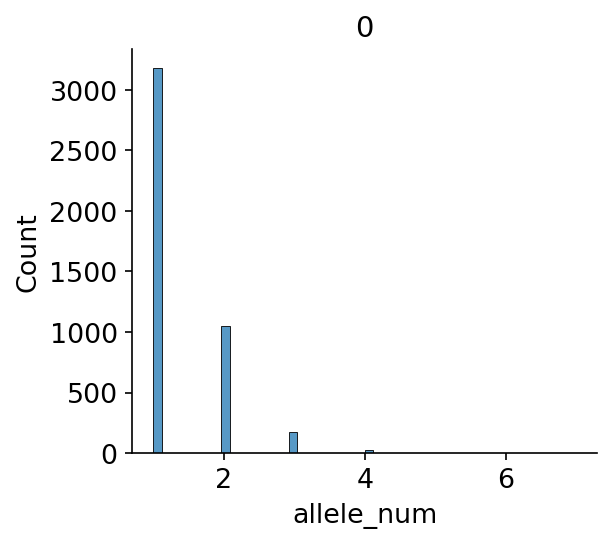

In [27]:
for j in range(len(df_assigned_clone_list)):
    fig,ax=plt.subplots(figsize=(4,3.5))
    sns.histplot(df_assigned_clone_list[j]['allele_num'],log_scale=False)
    plt.title(j)

<Axes: xlabel='allele_num', ylabel='Count'>

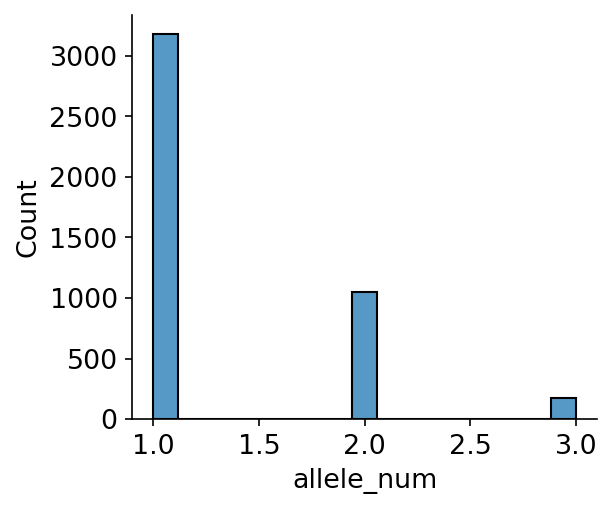

In [28]:
sns.histplot(df_assigned_clone_final['allele_num'],log_scale=False)